In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_dict = pickle.load(open('./data/data_consonantes.pickle', 'rb'))

# Convertir los datos a un array de NumPy
data = np.array([np.pad(d, (0, max(len(d) for d in data_dict['data']) - len(d)), 'constant') for d in data_dict['data']])
labels = np.asarray(data_dict['labels'])

# Convertir etiquetas a números
unique_labels = sorted(list(set(labels)))
label_to_num = {label: i for i, label in enumerate(unique_labels)}
num_labels = np.array([label_to_num[label] for label in labels])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, num_labels, test_size=0.2, random_state=42)

# Convertir etiquetas a formato categórico
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
print(label_to_num)
print(num_labels)

{'B': 0, 'C': 1, 'D': 2, 'F': 3, 'G': 4, 'H': 5, 'K': 6, 'L': 7, 'M': 8, 'N': 9, 'P': 10, 'Q': 11, 'R': 12, 'S': 13, 'T': 14, 'V': 15, 'W': 16, 'X': 17, 'Y': 18, 'Z': 19}
[ 0  0  0 ... 19 19 19]


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definir la arquitectura del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(data.shape[1],)),  # Asegúrate de que data.shape[1] corresponda a la longitud correcta
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_to_num), activation='softmax')  # La capa de salida debe tener tantas neuronas como clases
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64)

# Guardar el modelo entrenado
model.save('./model/model_consonantes.keras')

c:\Users\CARLOS VALDERA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1448 - loss: 2.7711 - val_accuracy: 0.6898 - val_loss: 1.5237
Epoch 2/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4303 - loss: 1.5977 - val_accuracy: 0.8571 - val_loss: 0.8232
Epoch 3/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5923 - loss: 1.1032 - val_accuracy: 0.8816 - val_loss: 0.5425
Epoch 4/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7005 - loss: 0.8368 - val_accuracy: 0.9054 - val_loss: 0.4102
Epoch 5/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7618 - loss: 0.6720 - val_accuracy: 0.9222 - val_loss: 0.3228
Epoch 6/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7904 - loss: 0.5927 - val_accuracy: 0.9232 - val_loss: 0.2555
Epoch 7/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8242 - loss: 0.5042 - val_accuracy: 0.9600 - val_loss: 0.2151
Epoch 8/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8452 - loss: 0.4496 - val_accu

In [4]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0024
Loss: 0.003260253230109811, Accuracy: 0.9990476369857788


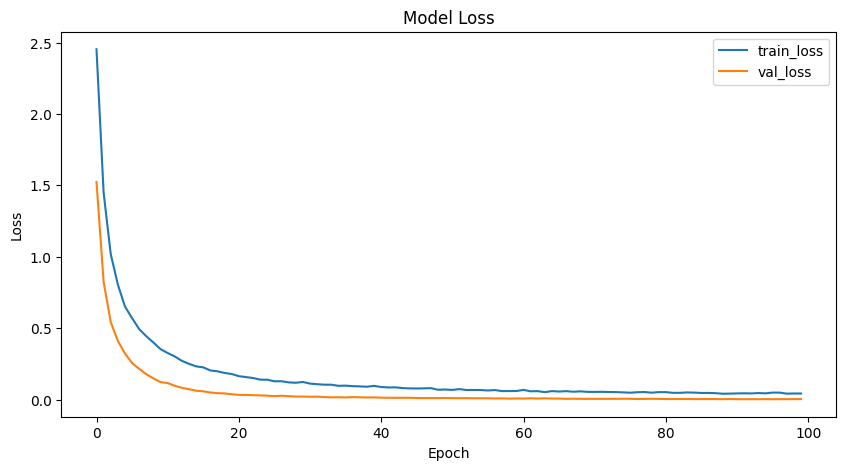

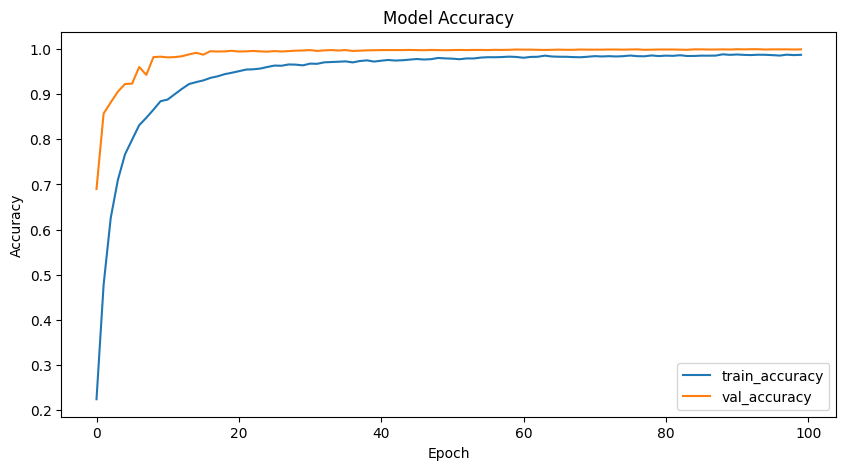

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
